<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/QM_Well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Julia で学ぶ量子力学](https://cometscome.github.io/QM/docs/build/)で解説されている無限井戸ポテンシャルのシュレディンガー方程式の Python への移植。

シュレディンガー方程式は
\begin{equation}
  \left(-\frac{\hbar^2}{2m}\nabla^2+U(x)\right) \psi(x) = E \psi(x)
\end{equation}
である。
1次元の場合に適切に無次元化すると
\begin{equation}
  \left(-\frac{d^2}{dx^2}+U(x)\right)\psi(x)=E\psi
\end{equation}
となる。
ハミルトニアンに含まれる2階微分の単純な差分表示は
\begin{equation}
\begin{split}
  &\left.\frac{d^2}{dx^2}\psi(x)\right|_{x=x_i}
  \sim\left.\frac{d}{dx}\frac{\psi(x+a/2)-\psi(x-a/2)}{a}\right|_{x=x_i} \\
  &\sim\left.\frac{d}{dx}\frac{\psi(x+a/2)-\psi(x-a/2)}{a}\right|_{x=x_i} \\
  &\sim\frac{\psi(x_i+a)-2\psi(x_i)+\psi(x_i-a)}{a^2}
\end{split}  
\end{equation}
となる。
これよりハミルトニアンの行列表示を得る。

In [1]:
import numpy as np

a = 0.01
N = 1000
H_mat: np.ndarray = np.zeros((N,N))
for i in range(N):
    for dx in range(-1,2):
        j = i + dx
        v = 0.0
        if dx == 0:
            v = 2/a**2
        elif dx == 1:
            v = -1/a**2
        elif dx == -1:
            v = -1/a**2
        if 0 <= j < N:
            H_mat[i,j] = v
print(H_mat)

[[ 20000. -10000.      0. ...      0.      0.      0.]
 [-10000.  20000. -10000. ...      0.      0.      0.]
 [     0. -10000.  20000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...  20000. -10000.      0.]
 [     0.      0.      0. ... -10000.  20000. -10000.]
 [     0.      0.      0. ...      0. -10000.  20000.]]


ハミルトニアンの行列表示を対角化することで固有関数・エネルギー固有値を得る。

Scipyは (Numpy) と違い、固有値を降順で表示することが可能。

In [2]:
from scipy import linalg
# 対称行列の対角化
e_val, P = linalg.eigh(H_mat)
e_vec = np.transpose(P)

固有値をプロットする

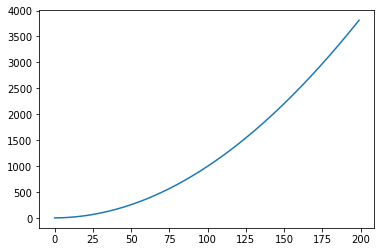

In [3]:
import matplotlib.pyplot as plt

sn = 200
level = np.arange(sn)
print()
plt.plot(level, e_val[level])

固有関数をプロット

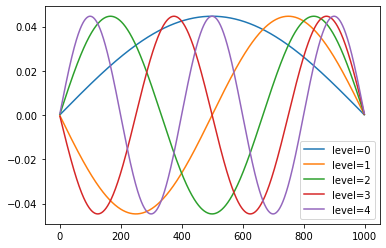

In [16]:
for i in range(5):
    plt.plot(e_vec[i], label='level=%d' %i)
plt.legend()